<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import psycopg2
import plotly.express as px

In [3]:
# Устанавливаем настройки подключения

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса

query_3_1 = f''' select count(distinct v.id) cnt
            from vacancies v
'''

In [5]:
# результат запроса

df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

C:\Users\User\AppData\Local\Temp\ipykernel_8660\1230663592.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


,cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса

query_3_2 = f''' select count(distinct e.id) cnt
            from employers e
'''

In [7]:
# результат запроса

df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2794694842.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


,cnt
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса

query_3_3 = f''' select count(distinct a.id) cnt
            from areas a
'''

In [9]:
# результат запроса

df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4093107843.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


,cnt
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса

query_3_4 = f''' select count(distinct ei.industry_id) cnt
            from employers_industries ei
'''

In [11]:
# результат запроса

df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4130007211.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


,cnt
0,294


***

Выводы по предварительному анализу данных
1. Общее количество вакансий в базе 49197;
2. ОБщее количество работодателей 23501;
3. ОБщее количество регионов 1362;
4. ОБщее количество сфер деятельности 294;
5. По общим цифрам чуть больше 2х вакансий на работодателя и чуть больше 36 ваканчий на регион (город);
6. Примерно 167 вакансий на одну сверу деятельности в среднем.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса

query_4_1 = f''' select 
            a.name,
            count(*) qnt
            
            from vacancies v
            full join areas a on v.area_id = a.id
            
            group by a.id
            order by qnt desc           
'''

In [13]:
# результат запроса

df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3831420866.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,name,qnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Слуцк,1
1358,Ува,1
1359,Тихорецк,1
1360,Олекминск,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса

query_4_2 = f''' select 
            count(v.id) qnt
            
            from vacancies v
            
            where salary_from is not null or salary_to is not null -- укажем фильтр, где или минимальная зарплата, или максималтная не равны нулю
           
'''

In [15]:
# результат запроса

df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4137227802.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


,qnt
0,24073


In [16]:
# Дополнительно найдем процент с заполненным хотя бы одним полем зарплаты от общего числа вакансий, округлим до десятой


round((df_4_2.loc[0][0]/df_3_1.loc[0][0]*100),1)

48.9

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса

query_4_3 = f''' select 
            round(avg(salary_from),0) min_average_salary, --среднее значение минимальной зарплаты
            round(avg(salary_to),0) max_average_salary --среднее значение максимальной зарплаты
            
            from vacancies v
            
            where salary_from is not null or salary_to is not null
'''    

In [18]:
# результат запроса

df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3088156882.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,min_average_salary,max_average_salary
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса

query_4_4 = f''' select
            v.schedule schedule,
            employment,
            count(*) cnt
            
            from vacancies v
            
            group by v.schedule, employment
            order by cnt desc
''' 

In [20]:
# результат запроса

df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4030108071.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


In [21]:
# Найдем дополнительно процент самого распространенного типа рабочего графика и типа работы

round((df_4_4.loc[0][2]/df_3_1.loc[0][0]*100),1)

71.9

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [22]:
# текст запроса

query_4_5 = f''' select
            v.experience experience, --выборка по опыту
            count(*) cnt
            
            from vacancies v
            
            group by v.experience
            order by cnt asc
''' 

In [23]:
# результат запроса

df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3700346512.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [24]:
# Найдем дополнительно процент двух самых распространенных требований по стажу: от 1 до 6 лет.

round(((df_4_5.loc[2][1]+df_4_5.loc[3][1])/df_3_1.loc[0][0]*100),1)

82.7

***

Выводы
1. Больше всего вакансий в городах-миллионниках: Москве, Санкт-Петербурге, Минске, Новосибирске и т.д(см. запрос 4.1);
2. 48,9% вакансий имеют хотя бы одно заполненное поле по данным о зарплате;
3. Нижняя средняя зарплата порядка 71тыс, верхняя - 111тыс. руб;
4. Подавляющее большинство вакансий 71,9% рассчитаны на полный рабочий день и полную занятость;
5. 82,7% процентов вакансий имеют требуемый стаж от 1 до 6 лет. Это возможно связано с необходимостью найти людей с небольшим и среднем стажем (молодежь).


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [59]:
# текст запроса

query_5_1 = f''' (select  --поиск первого места среди работодателей по количеству вакансий
            e.name,
            count(*) qnt,
            '1' place
            
            from vacancies v
            join employers e on v.employer_id = e.id
            
            group by e.name
            order by qnt desc
            limit 1)
            
            union
            (select --поиск пятого места среди работодателей по количеству вакансий
            ee.name,
            count(*) qnt,
            '5' place
            
            from vacancies vv
            join employers ee on vv.employer_id = ee.id
            
            group by ee.name
            order by qnt desc
            offset 4
            limit 1)
            
            order by place asc       
                           
'''

In [60]:
# результат запроса

df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3256782495.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,qnt,place
0,Яндекс,1933,1
1,Газпром нефть,331,5


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.

In [27]:
# текст запроса

#Вывод количества работодателей и вакансий по регионам

query_5_2 = f''' select a.name area_name, 
            count(distinct e.id) employmen_cnt, 
            count(distinct v.id) vacancy_cnt_
            
            from areas a
            left join employers e on a.id = e.area  
            left join vacancies v on v.area_id = a.id
            
            where v.id is null -- фильтр по отсутсвию вакансий по регионам
            group by a.id 
            order by employmen_cnt desc
           
'''
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2689127877.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


,area_name,employmen_cnt,vacancy_cnt_
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса

query_5_3 = f''' select e.name employer_name,
            count(distinct a.id) areas_cnt
            
            from vacancies v
            full outer join areas a on v.area_id = a.id 
            full outer join employers e on e.id = v.employer_id
            
            group by e.id
            having e.name is not null
            order by areas_cnt desc                
'''

In [29]:
# результат запроса

df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

C:\Users\User\AppData\Local\Temp\ipykernel_8660\1533821416.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


,employer_name,areas_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса

query_5_4 = f''' select 
            count(*) cnt
            
            from employers e
            left join employers_industries ei on e.id = ei.employer_id
            
            where ei.industry_id is null  -- выборка по отсутствию сфер деятельности
                         
'''

In [31]:
# результат запроса

df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2836417319.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса

query_5_5 = f''' select 
            e.name,
            count(ei.industry_id) cnt
            
            from employers_industries ei
            
            join employers e on e.id = ei.employer_id
            
            group by e.id
            having count(ei.industry_id) = 4 --фильтр по указанию 4х сфер деятельности
            order by e.name asc
            offset 2
            limit 1      
'''

In [33]:
# результат запроса

df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

C:\Users\User\AppData\Local\Temp\ipykernel_8660\352710580.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса

query_5_6 = f''' select 
            count(ei.industry_id) cnt
            
            from employers_industries ei
            join industries i on i.id = ei.industry_id
            
            group by i.id
            having i.name like 'Разработка программного обеспечения'
            order by cnt desc          
'''

In [35]:
# результат запроса

df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4229054033.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников

import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' 
response = requests.get(url) 
page = BeautifulSoup(response.text, 'html.parser') 
links = page.find_all('a')
list_sities = [link.text for link in links[46:63]] # Указаны ссылки на города, при обновлении данных границы выборки могут меняться
list_sities.remove('[a]')  # Убираем лишние символы в результатах поиска
list_sities=tuple(list_sities)  # Перводим тип результата из списка в кортеж для последующей работы фильтра
print(list_sities)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [61]:
# текст запроса

query_5_7 = f''' (select   -- выводим список вакансий по регионам для компании Яндекс
            a.name area_name,
            count(v.id) cnt
            
            from vacancies v
            join employers e on v.employer_id = e.id
            join areas a on a.id = v.area_id
            
            group by e.id, a.id
            having (e.name like 'Яндекс') and a.name in {list_sities} 
            order by cnt asc)
            
            union all
            
            select -- выводим общее количества вакансий
            'Total',
            count(*)
            
            from vacancies v
            join employers e on v.employer_id = e.id
            join areas a on a.id = v.area_id
            
            where (e.name like 'Яндекс') and a.name in {list_sities}
            order by 2 asc
'''

In [38]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2595257991.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7 = pd.read_sql_query(query_5_7, connection)


,area_name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Ростов-на-Дону,25
6,Казань,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

Выводы.
1. Максимальное количество работадателей и вакансий в Москве и Санкт-Петербурге;
2. В половине "регионов" отсутвуют как работодатели так и вакансии. Это может быть связано с отсутсвием развития предприятий в данных "регионах", либо отсутвием набора на предприятия;
3. Наибольшее распространение имеют системы связи, IT и строительства;
4. Порядка 8,5тыс компаний не указывают сферу деятельности. Это может быть связано с новизной фирмы, непостоянством деятельности (фирма-однодневка), либо с широким спектром (интернет-продажи);
5. Разработка програмного обеспечения находится на первом месте среди других сфер деятельности. Это может быть связано с приоритетным направлением в развитии и наибольшего распространения данных компаний (Большая возможность работать на удаленке);
6. Ваканчии компании Яндекс представлены во всех городах-миллионниках в количестве 21-42 шт. В Москве - 54.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
# текст запроса

query_6_1 = f''' select 
            count(v.name)
            
            from vacancies v
            
            where lower(v.name) like '%data%' or lower(v.name) like '%данн%'
                 
'''

In [40]:
# результат запроса

df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2598475464.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
# текст запроса

query_6_2 = f''' select 
            count(v.name)
            
            from vacancies v
            
            where (v.name ~* 'data scien(ce|tist)|исследователь данных|ML|machine learning|машинн.*обучен.*' and v.name !~* 'HTML') --поиск по ключеывым словам.
            and (v.name ~* 'junior' or v.experience = 'Нет опыта' or v.employment = 'Стажировка')
'''

In [42]:
# результат запроса

df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3342146679.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [43]:
# текст запроса

query_6_3 = f''' select 
            count(distinct v.id)
            
            from vacancies v
            
            where (name ilike '%data scientist%'
            or name ilike '%data science%'
            or name ilike '%исследователь данных%'
            or (name like '%ML%' and name not ilike '%HTML%')
            or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
            and (v.key_skills ~*'SQL|postgres')
            
'''

In [44]:
# результат запроса


df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

C:\Users\User\AppData\Local\Temp\ipykernel_8660\1261243162.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [45]:
# текст запроса
query_6_4 = f''' select 
            count(distinct v.id)
            
            from vacancies v
            
            where (name ilike '%data scientist%'
            or name ilike '%data science%'
            or name ilike '%исследователь данных%'
            or (name like '%ML%' and name not ilike '%HTML%')
            or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
            and v.key_skills ilike '%Python%'
'''


In [46]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

C:\Users\User\AppData\Local\Temp\ipykernel_8660\614304167.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [47]:
# текст запроса

query_6_5 = f''' select
            round(avg(length(v.key_skills)-length(replace(v.key_skills, CHR(9), ''))+1), 2) avg_key_skills --замена '\' на пустой символ, подсчет разницы в длинах предложений
            
            from vacancies v
            
            where (name ilike '%data scientist%'
            or name ilike '%data science%'
            or name ilike '%исследователь данных%'
            or (name like '%ML%' and name not ilike '%HTML%')
            or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
            and key_skills is not null         
'''

In [48]:
# результат запроса

df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3672045839.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


,avg_key_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
# текст запроса

query_6_6 = f''' select 
            experience,
            round(avg(coalesce((salary_from+salary_to)/2,salary_from, salary_to, 0)),0)  avg  -- расчет средней зарплаты
            
            from vacancies v
            
            where 
            (name ilike '%data scientist%'
            or name ilike '%data science%'
            or name ilike '%исследователь данных%'
            or (name like '%ML%' and name not ilike '%HTML%')
            or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
            and (salary_from != 0 or salary_to != 0)
            group by experience
'''

In [50]:
# результат запроса

df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3256924900.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


,experience,avg
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Выводы
1. Имеется порядка 1700 вакансий, касающихся данных, 50-ти вакансий для начинающих DS.
2. Каждые 3 года средняя зарплата DS увеличивается на 70 тыс. рублей (примерно).
3. Далеко не все работодатели указывают зарплатные данные по этим вакансиям.

Проведем дополнительное исследование вакансий

In [64]:
# Сделаем выборку, которая покажет количество вакансий по направляниям деятельности. Для этого присвоим имена сферам деятельности по расшифровкам их ID.
# Сначала присвоим имена сферам деятельности и занесем ее в таблицу industry_type. Затем отфильтруем те сферы, которые указаны в выборке industry_type.
query_7_1 = f'''
            with industry_type as (
            select 
            id,
            'Перевозки' id_type
            from industries i
            where id::float between 1 and 6
                        
            union
            
            select
            id,
            'Интернет/Разработка ПО'
            from industries i
            where id::float between 6 and 8
            
            union
            
            select
            id,
            'Электрооборудование'
            from industries i
            where id::float between 8 and 9
                   
            union
            
            select
            id,
            'Связь'
            from industries i
            where id::float between 9 and 10 
            
            union 
            
            select
            id,
            'Медиа'
            from industries i
            where id::float between 11 and 12       
            
            union
            
            select
            id,
            'Строительство'
            from industries i
            where id::float between 13 and 14  
            
            union
             
            select
            id,
            'Авто-, мототранспорт'
            from industries i
            where id::float between 15 and 16
            
            union 
            
            select
            id,
            'Деревообработка'
            from industries i
            where id::float between 19 and 20
            
            union 
            
            select
            id,
            'Металлургия'
            from industries i
            where id::float between 24 and 25
            
            union
             
            select
            id,
            'Продукты'
            from industries i
            where id::float between 27 and 28
            
            union
             
            select
            id,
            'С/х, рыболовство'
            from industries i
            where id::float between 29 and 30
           
            union 
            
            select
            id,
            'Тяжелое машиностроение'
            from industries i
            where id::float between 33 and 34 
            
            union
            
            select
            id,
            'Хим. промышленность'
            from industries i
            where id::float between 34 and 35 
            
            union 
            select
            id,
            'Гос/частные организации, школы'
            from industries i
            where id::float between 36 and 40
            
            union
            
            select
            id,
            'Продажа'
            from industries i
            where id::float between 40 and 43
            
            union 
            
            select
            id,
            'Финансовые,юридические услуги'
            from industries i
            where id::float between 43 and 45
            
            union 
            
            select
            id,
            'Энергетика (добыча, транспорт)'
            from industries i
            where id::float between 45 and 48
            
            union 
            
            select
            id,
            'Фармацевтика'
            from industries i
            where id::float between 48 and 49
            
            union 
            
            select
            id,
            'Бытовые услуги'
            from industries i
            where id::float between 49 and 53)
            
            select
            it.id_type вид_деятельности,
            count (distinct v.id) количество
            
            from vacancies v
            left join employers_industries ei on v.employer_id = ei.employer_id
            left join industry_type it on ei.industry_id = it.id
            
            group by it.id_type
            having it.id_type is not null
            order by 2 desc      
           
'''

df_7_1 = pd.read_sql_query(query_7_1, connection)
df_7_1

C:\Users\User\AppData\Local\Temp\ipykernel_8660\1555673769.py:166: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,вид_деятельности,количество
0,Интернет/Разработка ПО,21052
1,"Финансовые,юридические услуги",6322
2,Продажа,4015
3,Связь,2119
4,"Энергетика (добыча, транспорт)",2021
5,Электрооборудование,1703
6,Продукты,1537
7,Медиа,1431
8,Строительство,1391
9,"Гос/частные организации, школы",1233


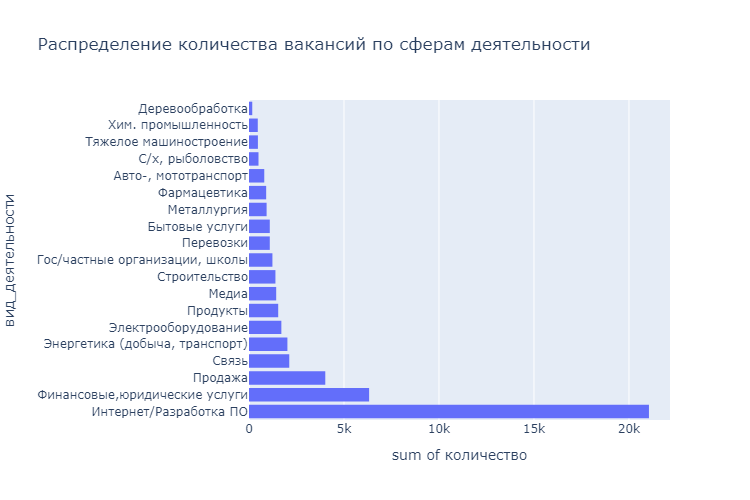

In [52]:
# Построим гистограмму для визуализации полученных данных.
hist = px.histogram(
    data_frame=df_7_1,
    y='вид_деятельности',
    x='количество',
    width=750,
    height=500,
    nbins=50,
    title='Распределение количества вакансий по сферам деятельности'

)
hist.show("png")
# Изображение для Github
#hist.write_html("images/hist.html")

In [53]:
# Построим график зависимости медианной заработной платы от сферы деятельности. Для начала

query_7_2 = f'''
            with industry_type as (
            select 
            id,
            'Перевозки' id_type
            from industries i
            where id::float between 1 and 6
                        
            union
            
            select
            id,
            'Интернет/Разработка ПО'
            from industries i
            where id::float between 6 and 8
            
            union
            
            select
            id,
            'Электрооборудование'
            from industries i
            where id::float between 8 and 9
                   
            union
            
            select
            id,
            'Связь'
            from industries i
            where id::float between 9 and 10 
            
            union 
            
            select
            id,
            'Медиа'
            from industries i
            where id::float between 11 and 12       
            
            union
            
            select
            id,
            'Строительство'
            from industries i
            where id::float between 13 and 14  
            
            union
             
            select
            id,
            'Авто-, мототранспорт'
            from industries i
            where id::float between 15 and 16
            
            union 
            
            select
            id,
            'Деревообработка'
            from industries i
            where id::float between 19 and 20
            
            union 
            
            select
            id,
            'Металлургия'
            from industries i
            where id::float between 24 and 25
            
            union
             
            select
            id,
            'Продукты'
            from industries i
            where id::float between 27 and 28
            
            union
             
            select
            id,
            'С/х, рыболовство'
            from industries i
            where id::float between 29 and 30
           
            union 
            
            select
            id,
            'Тяжелое машиностроение'
            from industries i
            where id::float between 33 and 34 
            
            union
            
            select
            id,
            'Хим. промышленность'
            from industries i
            where id::float between 34 and 35 
            
            union 
            select
            id,
            'Гос/частные организации, школы'
            from industries i
            where id::float between 36 and 40
            
            union
            
            select
            id,
            'Продажа'
            from industries i
            where id::float between 40 and 43
            
            union 
            
            select
            id,
            'Финансовые,юридические услуги'
            from industries i
            where id::float between 43 and 45
            
            union 
            
            select
            id,
            'Энергетика (добыча, транспорт)'
            from industries i
            where id::float between 45 and 48
            
            union 
            
            select
            id,
            'Фармацевтика'
            from industries i
            where id::float between 48 and 49
            
            union 
            
            select
            id,
            'Бытовые услуги'
            from industries i
            where id::float between 49 and 53)
            
            select
            it.id_type вид_деятельности,
            coalesce((salary_from+salary_to)/2,salary_from, salary_to)  зарплата
            
            from vacancies v
            left join employers_industries ei on v.employer_id = ei.employer_id
            left join industry_type it on ei.industry_id = it.id
            
            where it.id_type is not null and (salary_from != 0 or salary_to != 0) and (salary_from > 1000 or salary_to > 1000)
            order by 2 desc      
           
'''

df_7_2 = pd.read_sql_query(query_7_2, connection)
df_7_2


C:\Users\User\AppData\Local\Temp\ipykernel_8660\1204615755.py:165: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,вид_деятельности,зарплата
0,"Финансовые,юридические услуги",1000000
1,Продажа,750000
2,Продажа,750000
3,Интернет/Разработка ПО,750000
4,Продукты,750000
...,...,...
34463,Интернет/Разработка ПО,4000
34464,Интернет/Разработка ПО,4000
34465,"Гос/частные организации, школы",3506
34466,Продажа,2338


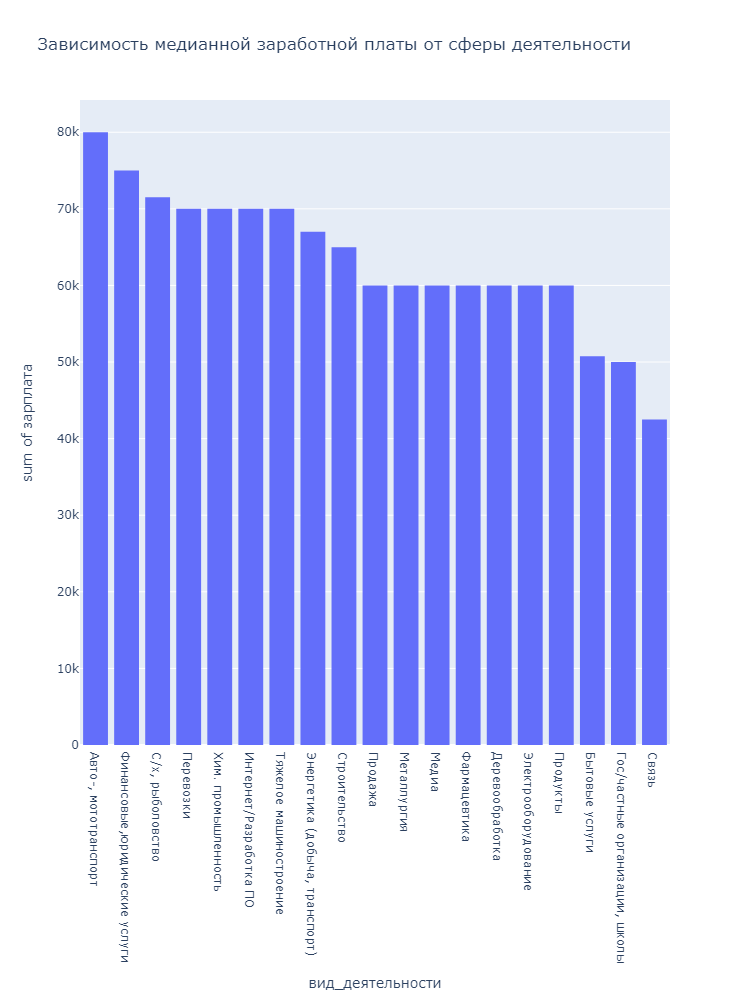

In [54]:
# Построим график зависимости медианной заработной платы от сферы деятельности по полученным данным. Используем точные значения медианной зарплаты.
salary_data = df_7_2.groupby('вид_деятельности', as_index=False)['зарплата'].median().sort_values(by= 'зарплата', ascending=False)

hist_2 = px.histogram(
    data_frame=salary_data,
    x='вид_деятельности',
    y='зарплата',
    width=750,
    height=1000,
    nbins=50,
    title='Зависимость медианной заработной платы от сферы деятельности'

)
hist_2.show("png")
# Изображение для Github
#hist_2.write_html("images/hist_2.html")

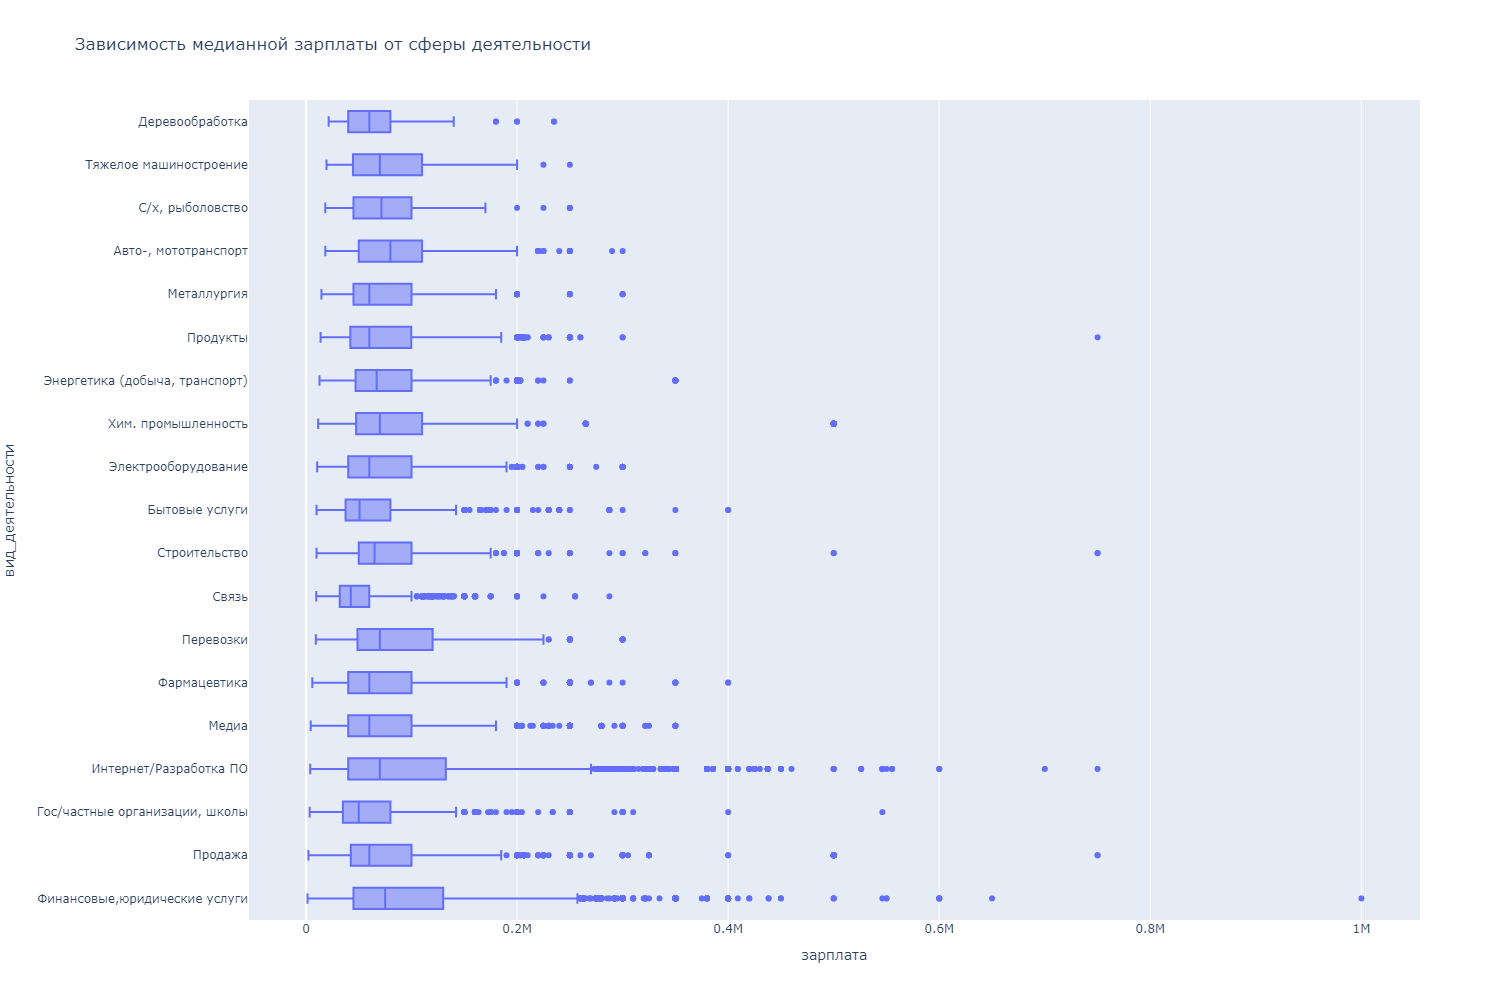

In [55]:
# Построим график зависимости медианной заработной платы с вычислением медианой с учетом всех данных.

box = px.box(
    data_frame=df_7_2.sort_values(by= 'зарплата', ascending=True),
    y='вид_деятельности',
    x='зарплата',
    width=1500,
    height=1000,
    title='Зависимость медианной зарплаты от сферы деятельности'
    )
box.show("png")
# Изображение для Github
#box.write_html("images/box.html")

# Общий вывод по проекту

1. Проведено исследование базы данных HeadHunter по работодателм с использованием SQL и Python.
2. В базе имеются порядка 50тыс. вакансий и 23 тыс. работодателей из 1,3 тыс регионов (городов.).
3. В подавляющем большинстве вакансий (35тыс.) указаны работа на полный день и полная занятость. Это может бысть связано с необходимостью закрытия ставки целиком, и большей необходимости вовлеченности персонала в работу.
4. Средняя минимальная заработная плата примерно соответсвует средней зарплате по стране (в 69тыс).
5. По количеству вакансий первые позиции занимают информационные технологии, связь, банковское дело, нефтегазодобывающая промышленность. Это может быть связано с приоритетным направлением деятельности, большими прибылями данных компаний и/или большими субсидиями на развитие от государства.
6. Среди вансий имеется достаточное количество вакансий для Data Science (DS), как для опытных специалистов, так и для начинающих.
7. Средняя  зарплата у DS растет примерно по формуле 1000$(1+x/3), где х- стаж в годах. Т.е даже начинающий DS может рассчитывать на зарплату в 1000$.
8. В дополнительных ииследованиях видно, что число вакансий в сфере программного обоспечения составляет болше половины от общего числа вакансий. Это может быть по причине быстрого развития информационных технологий и наибольшей прибыльности отрасли. Если база обновилась после 09.2022, то большое количесво вакансий может быть связано с "отъездом" специалистов в данной области.
9. При наибольшем количестве вакансий у разработки ПО, самую большую медианную зарплату имеет авто/мототранспорт (продажа, обслуживание и т.д) и финансовый/юридический сектор. При этом разработка ПО имеет наибольшее число возможных "выбросов по зарплате". Это может быть связано с широким диапазоном предлагаемых зарплат и большой разницей для начинающих и опытных работников.
10. Максимально возможную зарплату в 1млн. предлагают в финансовом секторе, затем по 750тыс в продажах, разработке ПО, строительстве и продуктах (продажа продуктов).

11. Для дополнительных исследований необходимо проводить анализ в динамике: по количеству вакансий в отрасли/регионе/организации за определнный период, к примеру месяц. день, год. Это позволит выявить тенденции и закономерности в развитии/деградации отрасли и соответсвенно средней зарплаты в ней.
12. Также для дополнительного исследования можно провести анализ зависимости знания определенной программы (методов анализа) для разработчиков ПО и заработной платы, и количества программ, знание которых максимально увеличивают предлагаемую зарплату.

In [65]:
#connection.close()